In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
import seaborn as sns

In [2]:
happiness = pd.read_csv('data/2019.csv')
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [3]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Generosity : 자선(관용)

Perceptions of corruption : 부패에 대한 인식

In [4]:
happiness.sort_values(by = ['Generosity'], ascending = False).head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
120,121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053


In [5]:
happiness.sort_values(by = ['Perceptions of corruption'], ascending = False).head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380


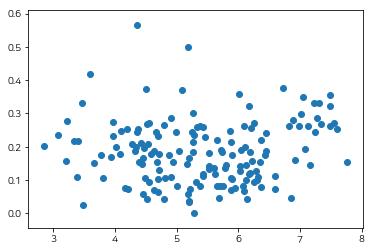

In [6]:
plt.scatter(happiness['Score'], happiness['Generosity'])
plt.show()

In [7]:
# Perceptions of corruption -> PoC
happiness = happiness.rename(columns={'Perceptions of corruption' : 'PoC'})

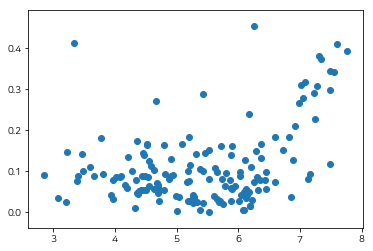

In [8]:
plt.scatter(happiness['Score'], happiness['PoC'])
plt.show()

In [9]:
# 상관계수
corr = happiness[['Generosity', 'PoC', 'Score']].corr(method='pearson')
corr

,Generosity,PoC,Score
Generosity,1.000000,0.326538,0.075824
PoC,0.326538,1.000000,0.385613
Score,0.075824,0.385613,1.000000


상관관계가 매우 약함

피어슨 - 0.7~1.0사이 : 강한 상관 관계

### 상관계수 검증
#### 상관계수의 값이 통계적으로 유의미한지 검정하는 것
- 귀무가설 : 상관관계가 없다
- 대립가설 : 상관관계가 있다
</br>

##### p-value : 통계의 유의성을 대표하는 지표
- 귀무가설에 대한 확률값
- 사회과학분야의 유의수준(알파값 or 임계값) : 0.05 즉, 95%의 신뢰도
- 의생명분야의 유의수준 : 0.01, 99%의 신뢰도
- p-value >= 0.05 : 대립가설 기각, 귀무가설 채택
- p-value < 0.05 : 대립가설 채택, 귀무가설 기각

In [10]:
import scipy.stats as stats

corr, pValue = stats.pearsonr(happiness['Generosity'], happiness['Score'])
print(corr, pValue)

0.07582369490389651 0.3468195386840116


p-value : 0.34 = 상관관계가없다.

In [11]:
corr, pValue = stats.pearsonr(happiness['PoC'], happiness['Score'])
print(corr, pValue)

0.3856130708664786 6.65401093847035e-07


p-value : 6.65 = 상관관계없다.

In [12]:
# 상관계수
corr = happiness[['GDP per capita', 'Social support', 'Score']].corr(method='pearson')
corr

,GDP per capita,Social support,Score
GDP per capita,1.000000,0.754906,0.793883
Social support,0.754906,1.000000,0.777058
Score,0.793883,0.777058,1.000000


In [15]:
corr, pValue = stats.pearsonr(happiness['GDP per capita'], happiness['Score'])
print(corr, pValue)

0.7938828678781276 4.315480913319409e-35


In [ ]:
corr, pValue = stats.pearsonr(happiness['Social support'], happiness['Score'])
print(corr, pValue)